<a href="https://colab.research.google.com/github/spatank/CIS-545/blob/master/project_SPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we analyze drug co-prescription networks. Nodes in these networks represent anti-epileptic drugs, and edges correspond to the frequency with which two drugs are prescribed together. In order to identify changing prescription practices as children grow older, we examine trends in the edge weight values over time. Next, we cluster network nodes into groups based on their co-prescription statistics using a data-driven community detection technique.

# Imports

In [1]:
import os
from google.colab import drive

# mount Google Drive
drive.mount('/content/gdrive')
os.chdir('gdrive/MyDrive/CIS545_2020/Project')
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import savemat
import networkx as nx

Mounted at /content/gdrive


The following code block loads in adjacency matrices corresponding to the co-prescription networks. Additionally, abbreviated names of 20 AEDs that comprise the networks are also loaded in.

In [2]:
vars = np.load('AED_matrices.npz', allow_pickle = True)
for item in vars.files:
  print(item)

arr_0
arr_1
arr_2


In [3]:
total_adj = vars['arr_0'] # sum of all co-prescription counts across time
time_var_adj = vars['arr_1']
med_names = vars['arr_2']

In [4]:
time_var_adj.shape[2]

37

In [5]:
def transpose(matrix):
    num_lists_in_transpose = len(matrix[0])
    transpose_matrix = [] # initialize empty transpose matrix
    for i in range(num_lists_in_transpose): 
        list_for_transpose = [] # begin building each transpose list
        for original_list in matrix: 
            # index the element from the non-tranpose list and place it 
            # in the tranposed list corresponding to the index
            list_for_transpose.append(original_list[i])
        transpose_matrix.append(list_for_transpose)
    return transpose_matrix

# Drug Co-prescription over Time

Older patients transition away from pediatric neurologists. As a result, we follow Helbig Lab convention and limit our analyses to 25 years. Since we intend to examine trends based on data drawn from different years, we normalize each adjacency matrix by the sum total of all edge weight values. We then select the upper triangular matrix from each co-prescription network, and flatten the result to get edge weight values for the 190 unique drug pairs. Following this procedure for 25 networks yields the evolution of edge weight values over time. 

In [11]:
years = 25 
upper_tri_indices = np.triu_indices(20, k = 1)
edges_across_time = []
for idx in range(years):
  curr_adj_mat = time_var_adj[:, :, idx]
  if np.sum(curr_adj_mat) != 0:
    curr_adj_mat = curr_adj_mat/np.sum(curr_adj_mat) # normalize
  edges_across_time.append(curr_adj_mat[upper_tri_indices])
edges_across_time = transpose(edges_across_time)

In [12]:
all_variances = [np.nanvar(lst) for lst in edges_across_time]
ranked = np.argsort(all_variances)
high_variance_edge_IDs = ranked[::-1][:len(ranked)]

row_indices = upper_tri_indices[0]
col_indices = upper_tri_indices[1]
all_edges = []
for idx in range(len(row_indices)):
  all_edges.append(tuple([med_names[row_indices[idx]], med_names[col_indices[idx]]]))

high_variance_edges = []
for edge_ID in high_variance_edge_IDs:
  high_variance_edges.append([edge_ID, all_edges[edge_ID], all_variances[edge_ID]])

In [29]:
high_variance_edges

[[2, ('LEV', 'PHB'), 0.00011584857203832703],
 [12, ('LEV', 'TPM'), 7.686320012419152e-05],
 [1, ('LEV', 'LTG'), 6.751595922585103e-05],
 [63, ('PHB', 'TPM'), 5.5732623198214246e-05],
 [0, ('LEV', 'OXC'), 4.767338450037525e-05],
 [3, ('LEV', 'VPA'), 4.5726899144843726e-05],
 [78, ('VPA', 'TPM'), 3.0179428189607466e-05],
 [38, ('LTG', 'VPA'), 2.7571831400267273e-05],
 [169, ('TPM', 'VGB'), 2.0322282983271022e-05],
 [47, ('LTG', 'TPM'), 1.7917061261640534e-05],
 [43, ('LTG', 'ZNS'), 1.1453012776232553e-05],
 [20, ('OXC', 'PHB'), 1.0808032842566752e-05],
 [58, ('PHB', 'FOS'), 9.379923992992795e-06],
 [8, ('LEV', 'ZNS'), 9.051335780134165e-06],
 [19, ('OXC', 'LTG'), 8.760806531786743e-06],
 [10, ('LEV', 'LCM'), 8.748270809729864e-06],
 [6, ('LEV', 'PHT'), 8.043461604788047e-06],
 [74, ('VPA', 'ZNS'), 8.041583431138874e-06],
 [57, ('PHB', 'PHT'), 7.947552461322726e-06],
 [30, ('OXC', 'TPM'), 7.803206383893985e-06],
 [13, ('LEV', 'VGB'), 7.66654203722539e-06],
 [7, ('LEV', 'FOS'), 6.84886894

In [ ]:
# 1, 38, 47 rises
# 5 not prescribed to infants but then rises
# 12, 63 decreases
# 0, 3, 78 rise then fall
# 169 high and then very low

Next, we show example plots of co-prescription as a function of time for select pairs of AEDs.

Text(0, 0.5, 'Normalized Co-prescription')

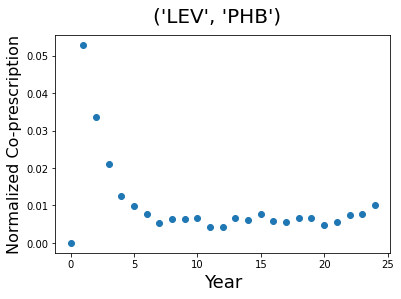

In [27]:
edge = 2
fig = plt.figure()
plt.scatter(list(range(len(edges_across_time[edge]))), edges_across_time[edge])
fig.suptitle(str(all_edges[edge]), fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

LEV and PHB co-prescription decreases by year. PHB is usually prescribed to babies, and has lots of side-effects. Patients are often transferred over to LEV.

Text(0, 0.5, 'Normalized Co-prescription')

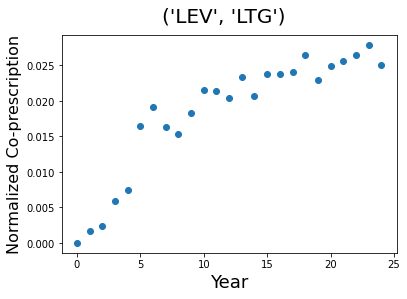

In [28]:
edge = 1
fig = plt.figure()
plt.scatter(list(range(len(edges_across_time[edge]))), edges_across_time[edge])
fig.suptitle(str(all_edges[edge]), fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

The LEV-LTG combination of drugs has fewer side-effects. Patients tend to stay on this combination if it works well for them.

Text(0, 0.5, 'Normalized Co-prescription')

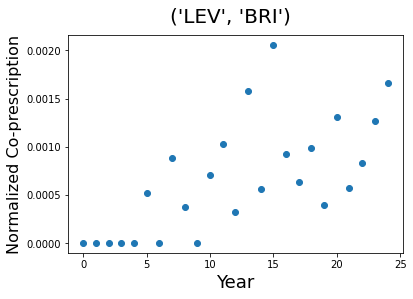

In [33]:
edge = 5
fig = plt.figure()
plt.scatter(list(range(len(edges_across_time[edge]))), edges_across_time[edge])
fig.suptitle(str(all_edges[edge]), fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Normalized Co-prescription', fontsize = 16)

We also find instances where certain combinations of drugs such as LEV-BRI are never prescribed to infants. LEV has adverse behavioral trends such as a tendency to induce rage in patients. Infants are instead prescribed BRI, and then gradually titrated over to LEV.

# Community Detection

In this section, we infer communities of drugs based on their co-prescription counts. We begin by constructing a *total* co-prescription network using all available data. We then fit a network model called the *weighted stochastic block model* (WSBM) to the adjacency matrix corresponding to the co-prescription network. 

The WSBM is a generative network model that is parameterized by nodal community assignments. Each network node belongs to a community, or block, which determines the strength of its connections to nodes in other blocks.

As a result, one of the outcomes of fitting a block model to a network is the community assignments for each node. Details about the WSBM and the inference algorithm are available [elsewhere](https://aaronclauset.github.io/wsbm/). We use a Matlab-based implementation of the inference algorithm.

The WSBM requires that the number of blocks ($k$) in the network being modelled be known *a priori*. Since it is a generative model, the quality of a WSBM's fit to data can be evaluated with the likelihood of observing the data with the estimated model. Therefore, we sweep across a range of values for $k$, and choose that value which maximizes the likelihood. 

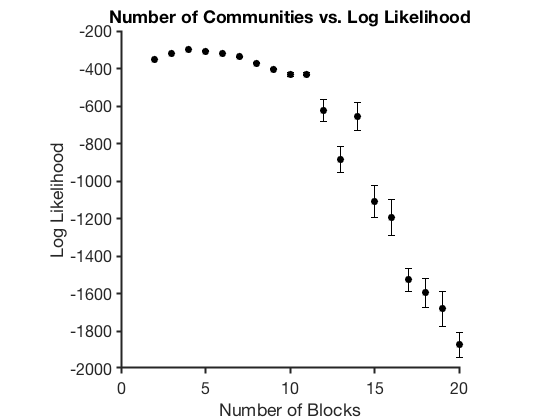

We find that likelihood is maximized when $k = 4$. 

The resulting partition of the network (represented here as a weighted adjacency matrix) into blocks is shown in the following figure:

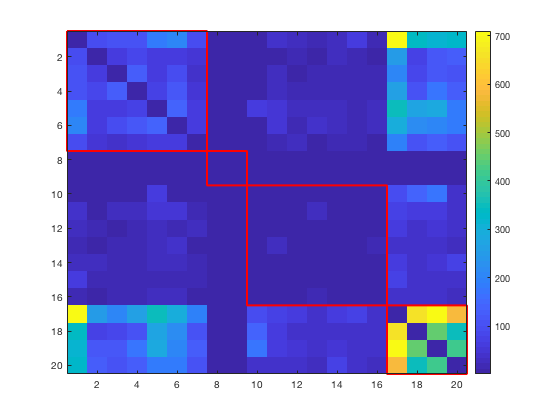

Starting from the top left and moving down along the diagonal to the bottom right, the red lines delineate network blocks or communities. Each network node, or AED in this context, is assigned to a block based on its patterns of co-prescription across the network. 

The four groups of AEDs identified are:

Block 1: [OXC, PHB, PHT, FOS, ZNS, LCM, GPT]

Block 2: [MSM, PRM]

Block 3: [ETX, BRI, ACZ, PER, VGB, CBZ, FELB]

Block 4: [LEV, LTG, VPA, TPM]

Experts from the Helbig Lab identified the AEDs in Block 1 as those administered to patients with focal epilepsies, and in Block 4 as those administered to patients with generalized seizures. More interestingly, Block 3 drugs are administered to patients with the Lennox-Gastaut syndrome (LGS), which is a rare form of childhood-onset epilepsy. Block 2 AEDs are perhaps grouped together due to the rarity with which they are prescribed. 

